# **Load Data** #

**Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.**

In [66]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [67]:
iris_df = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\CODSOFT\\Task3\\IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
print("Number of Rows:",iris_df.shape[0])
print("Number of Columns:",iris_df.shape[1])

Number of Rows: 150
Number of Columns: 5


In [69]:
#checking datastypes and info
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
# describe data statistics 
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
# how many values in each species 
iris_df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### **Cleaning** ###

In [72]:
# check for null values 
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### **Visual representation** ###

In [73]:
colours = ['pink', 'red', 'orange']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

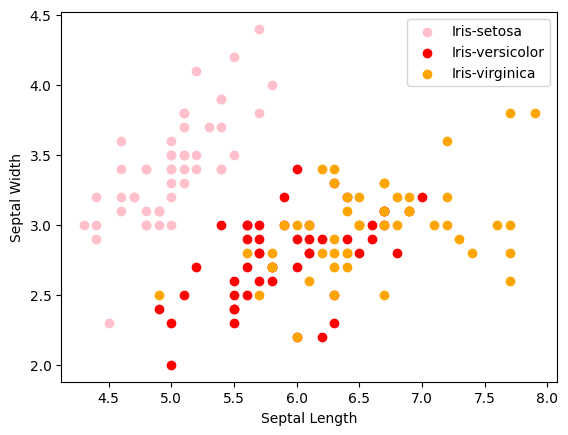

In [74]:
for i in range(3):
    x = iris_df[iris_df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colours[i], label=species[i])
    plt.xlabel("Septal Length")
    plt.ylabel("Septal Width")
    plt.legend()

# **Data Prep** #

**Encode**

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
iris_df['species'] = le.fit_transform(iris_df['species'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## **Model Training** ##

In [77]:
from sklearn.model_selection import train_test_split
# train - 80
# test - 20
x = iris_df.drop(columns=['species'])
y = iris_df['species']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

### **Logistic Regression** ###

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [79]:
# model training
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
# print metric 
print("Accuracy:", lr.score(x_test, y_test) * 100) 

Accuracy: 96.66666666666667
